In [4]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## pre-processing elbe Chlorophyll data

In [14]:
# Get xls files list from a folder
#os.getcwd()
os.chdir("C:\\Users\\Hannah Russell\\north_sea_estuaries_visualisations")

cwd = os.path.abspath(os.curdir)
elbe_turbidity_df_1 = glob.glob(os.path.join(cwd, 'data', 'input', 'elbe', 'turbidity','df_1', '*.xls'))
elbe_turbidity_df_1 = [pd.read_excel(file) for file in elbe_turbidity_df_1]
#df_list = (pd.read_excel(file) for file in xls_files)
elbe_turbidity_df_1 = pd.concat(elbe_turbidity_df_1, ignore_index=True)

elbe_turbidity_df_1.head()

Gew�sser Wasserk�rper                   Messstelle Stromkilometer  \
0     Elbe    Elbe-West  Blankenese (Strom-km 634,3)          634.3   
1     Elbe    Elbe-West  Blankenese (Strom-km 634,3)          634.3   
2     Elbe    Elbe-West  Blankenese (Strom-km 634,3)          634.3   
3     Elbe    Elbe-West  Blankenese (Strom-km 634,3)          634.3   
4     Elbe    Elbe-West  Blankenese (Strom-km 634,3)          634.3   

       Parameter Messwert Einheit               Messwerttyp  \
0  Trübung (FNU)     30,6     FNU  quantitativ nachgewiesen   
1  Trübung (FNU)     39,7     FNU  quantitativ nachgewiesen   
2  Trübung (FNU)     37,2     FNU  quantitativ nachgewiesen   
3  Trübung (FNU)     34,0     FNU  quantitativ nachgewiesen   
4  Trübung (FNU)     35,1     FNU  quantitativ nachgewiesen   

                 Medium      Messwertart                Messvorgang  \
0  Wasser - Gesamtprobe  Tagesmittelwert  kontinuierliche Messungen   
1  Wasser - Gesamtprobe  Tagesmittelwert  kontinuierliche Messungen   
2  Wasser - Gesamtprobe  Tagesmittelwert  kontinuierliche Messungen   
3  Wasser - Gesamtprobe  Tagesmittelwert  kontinuierliche Messungen   
4  Wasser - Gesamtprobe  Tagesmittelwert  kontinuierliche Messungen   

        Datum  Bezugsjahr Zeit  Datum bis  Zeit bis       Status  \
0  02.01.1997        1997  NaN        NaN       NaN  freigegeben   
1  03.01.1997        1997  NaN        NaN       NaN  freigegeben   
2  06.01.1997        1997  NaN        NaN       NaN  freigegeben   
3  07.01.1997        1997  NaN        NaN       NaN  freigegeben   
4  08.01.1997        1997  NaN        NaN       NaN  freigegeben   

  Analysemethode  Bemerkung (Datenausgabe)  zus�tzliche Informationen  
0              -                       NaN                        NaN  
1              -                       NaN                        NaN  
2              -                       NaN                        NaN  
3              -                       NaN                        NaN  
4              -                       NaN                        NaN

In [15]:
elbe_turbidity_df_1['Messwert'] = elbe_turbidity_df_1['Messwert'].str.replace(",", ".")
elbe_turbidity_df_1.drop(elbe_turbidity_df_1[elbe_turbidity_df_1.Stromkilometer.str.contains('[Nebenge]', na=False)].index, inplace=True)
Stromkilometer = elbe_turbidity_df_1['Stromkilometer'].astype(float)
Messwert = elbe_turbidity_df_1['Messwert'].astype(float)

Text(0, 0.5, 'Turbidity FNU')

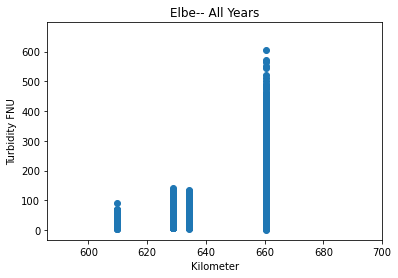

In [3]:
#plot all values on one plot
plt.scatter(Stromkilometer, Messwert)
plt.gca().invert_xaxis()
plt.xlim(586,700) #Geestacht is at ~586 km
plt.title('Elbe-- All Years')
plt.xlabel('Kilometer')
plt.ylabel('Turbidity FNU')

In [5]:
turb_avg = turbidity[['Stromkilometer', 'Messwert']]
turb_avg.dropna()
turb_avg = turb_avg.groupby('Stromkilometer', as_index = False).median() #for some reason this is invalid even though median() works... not sure yet what's wrong here
turb_avg

Stromkilometer  Messwert
0              3.9      10.5
1             26.5       3.8
2             89.6      11.7
3            172.6      14.6
4            216.6      13.4
5            318.1      20.0
6            470.0      10.9
7            474.5      19.5
8            609.8      18.2
9            628.9      30.6
10           634.3      25.6
11           660.6      73.8

Text(0, 0.5, 'turbidity')

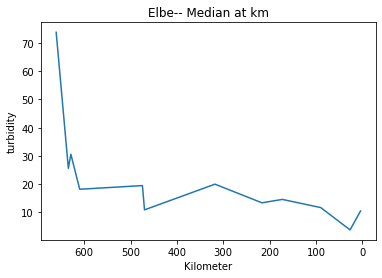

In [6]:
km_avg = turb_avg['Stromkilometer']
Messwert_avg = turb_avg['Messwert']
plt.plot(km_avg, Messwert_avg)
plt.gca().invert_xaxis()
plt.title('Elbe-- Median at km')
plt.xlabel('Kilometer')
plt.ylabel('turbidity')

In [8]:
elbe_depth = pd.read_csv('Elbe Depth.csv')
elbe_depth['Stromkilometer'] = elbe_depth['Stromkilometer'].astype(float).round(1)
Stromkilometer2 = elbe_depth['Stromkilometer']
Depth = elbe_depth['Depth']
elbe_depth

Stromkilometer      Depth
0             537.9  -2.574074
1             546.2  -1.666667
2             561.8   0.131687
3             572.3   0.370370
4             579.6   1.267490
..              ...        ...
131           821.8  25.481481
132           823.2  26.518519
133           824.9  24.888889
134           826.0  24.444444
135           828.8  25.481481

[136 rows x 2 columns]

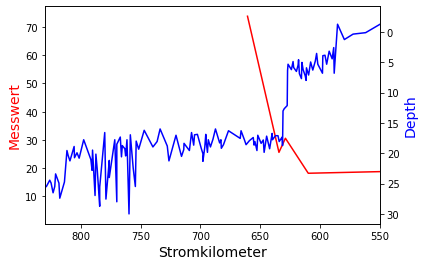

In [11]:
# create figure and axis objects with subplots()
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

# make a plot
ax1.plot(km_avg, Messwert_avg, color="red") # this line won't show up when there is a limit on the x axis
ax2.plot(Stromkilometer2, Depth, color="blue")

# x-axis
ax1.set_xlabel("Stromkilometer", fontsize = 14)
ax2.set_xlim(586,830) 
plt.xticks(np.arange(550, 850, step=50))
plt.gca().invert_xaxis()

# y-axis labels
ax1.set_ylabel("Messwert", color="red", fontsize=14)
ax2.set_ylabel("Depth",color="blue",fontsize=14)
ax2.invert_yaxis()